# Home Credit Group

## Introduction

In today word banks often deals with challenges in assessing the risk of loan defaults. To help them make better decisions, our startup aims to provide Risk Evaluation as a Service using machine learning. By analyzing patterns in data, we can help bank to predict risk and manage it more efficiently. 

Objectives for this Part
<li>Translating business requirements into data science tasks.</li>
<li>Perform Exploratory Data Analysis.</li>
<li>Apply statistical inference procedures.</li>
<li>Use machine learning to solve business problems.</li>
<li>Deploy multiple machine learning models.</li>

Aim of the Project

The aim is to build a machine learning model which helps bank evaluate the loan risk. Using the Home Credit dataset, we will create models that predict which loans are likely to be risky, providing useful insights for banks. This project will include data analysis, model building and deployment to a cloud platform.

Our work will be split into separate notebooks each covering different parts of the project.

Main dataset can be downloaded from <b>[here](https://storage.googleapis.com/341-home-credit-default/home-credit-default-risk.zip)</b>.

## Notebook Preparation

In [1]:
%matplotlib inline

# Standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import featuretools as ft

# Local libraries
from src.utils import (
    csv_to_parquet, 
    count_duplicated_rows, 
    missing_percentage, 
    reduce_memory_usage_pd, 
    transform_columns, 
    hypothesis_testing)
from src import plot_utils

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Notebook styles
sns.set(style="darkgrid", palette="pastel")
palette_cmap = sns.color_palette("mako", as_cmap=True)
plt.rcParams['figure.figsize'] = [14, 6]

# Pandas configuration
pd.set_option("display.max_columns", None)

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Path to data files 
path_csv = "data/raw_csv"
path_parque = "data/raw_parquet"
path_filtered = "data/filtered"

csv_to_parquet(folder_path=path_csv, path_to_save=path_parque, overwrite=False)

# Loading the datasets
application_train = pd.read_parquet(f"{path_parque}/application_train.parquet", engine="pyarrow")

Parquet file for application_test.csv already exists and will not be overwritten.
Parquet file for application_train.csv already exists and will not be overwritten.
Parquet file for bureau.csv already exists and will not be overwritten.
Parquet file for bureau_balance.csv already exists and will not be overwritten.
Parquet file for credit_card_balance.csv already exists and will not be overwritten.
Parquet file for installments_payments.csv already exists and will not be overwritten.
Parquet file for POS_CASH_balance.csv already exists and will not be overwritten.
Parquet file for previous_application.csv already exists and will not be overwritten.
Parquet file for sample_submission.csv already exists and will not be overwritten.


In [4]:
# Reducing dataframe memory
application_train = reduce_memory_usage_pd(application_train)

Memory before: 286.23 MB. 
Memory after: 95.32 MB.
Percent of reduction: (66.7% reduction)


## Exploratory Data Analysis

We will start our EDA step with analysing application_train dataset, to avoid overfitting and data leakage, we will explore only train dataset. Later if we see our model performs not efficient we will explore additional datasets, so we could always add additional features.

In [5]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(16), float32(65), int16(2), int32(2), int8(37)
memory usage: 95.3 MB


We have 307,511 rows of data and 122 features. Most of the features are numeric ones, which consists of float and int data types, while categorical are 16.

In [6]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

From few rows of our dataset we already see that a lof ot features have missing values we need to investigate how many percent of data is missing for columns, so we can think of solution how to handle missing values. But first check for duplicate values and remove them if exists.

In [7]:
count_duplicated_rows(application_train)

The DataFrame contains 0 duplicated rows.


In [8]:
missing_df = missing_percentage(application_train)
high_missing_features = missing_df[missing_df["Percent_missing"] > 50].index
missing_df

,Total_missing,Percent_missing
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


Train dataset consists of features with more than 50% of missing values in colum, we will consider of removing these columns as most of them just is describing the apartment of customer if our model performs bad.

In [9]:
application_train = ft.selection.remove_highly_null_features(application_train, pct_null_threshold=0.5)

### Dealing With Outliers

In [10]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.020868,-16036.995067,63815.045904,-4986.120117,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143928e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858765,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737305,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886230,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808472,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

Some of the rows have value 365243 which is quite odd, for example Days Employed show 365243 as a value, so it would be 1000 years which could be impossible, it is a mistake or a NaN value. As it often occurred it is possible that is just a NaN value, let's change it in our dataset to be NaN.

In [11]:
application_train = application_train.replace({365243: np.nan})

AMT_INCOME_TOTAL looks suspicious also. Let's investigate this feature.

In [12]:
application_train["AMT_INCOME_TOTAL"].sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float32

Income of the client show that one only one person have 117 millions, while next biggest value is only 10 millions. It is possible that there was a mistake by adding to much 0 in the end, or possible it is valid value, either way we will cap this feature to be 0.95 quantile of the column, to save our model from overwriting.

In [13]:
quantile_threshold = application_train["AMT_INCOME_TOTAL"].quantile(0.95)
application_train["AMT_INCOME_TOTAL"] = application_train["AMT_INCOME_TOTAL"].clip(upper=quantile_threshold)

We can also see that column SK_ID_CURR is not important to us, as it is describing the column unique ID which can also lead to poor model performance, we will remove this column from both datasets.

In [14]:
#application_train = application_train.drop(columns=["SK_ID_CURR"])
#application_test = application_test.drop(columns=["SK_ID_CURR"])

### Target feature distribution

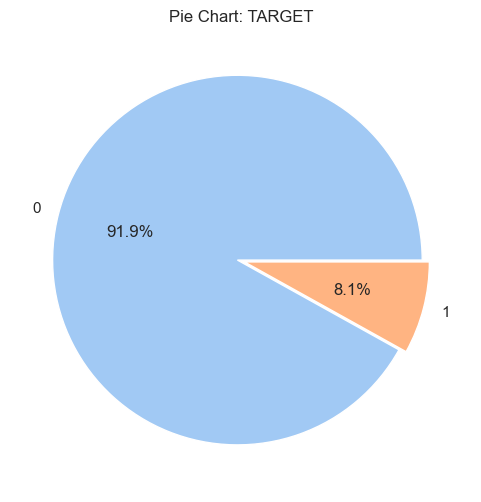

<Figure size 1400x600 with 0 Axes>

In [15]:
plot_utils.pie_plot(df=application_train, target_col="TARGET")

Our dataset for target feature is not balance, it shows that about 1 of 10 people only get loan from the bank. It is good for bank, as they are not trowing loans one after another, they have strict rules which person can get loan. But for our ML model it will be challenge, we will consider to use weights on specific values to get better f1 score.

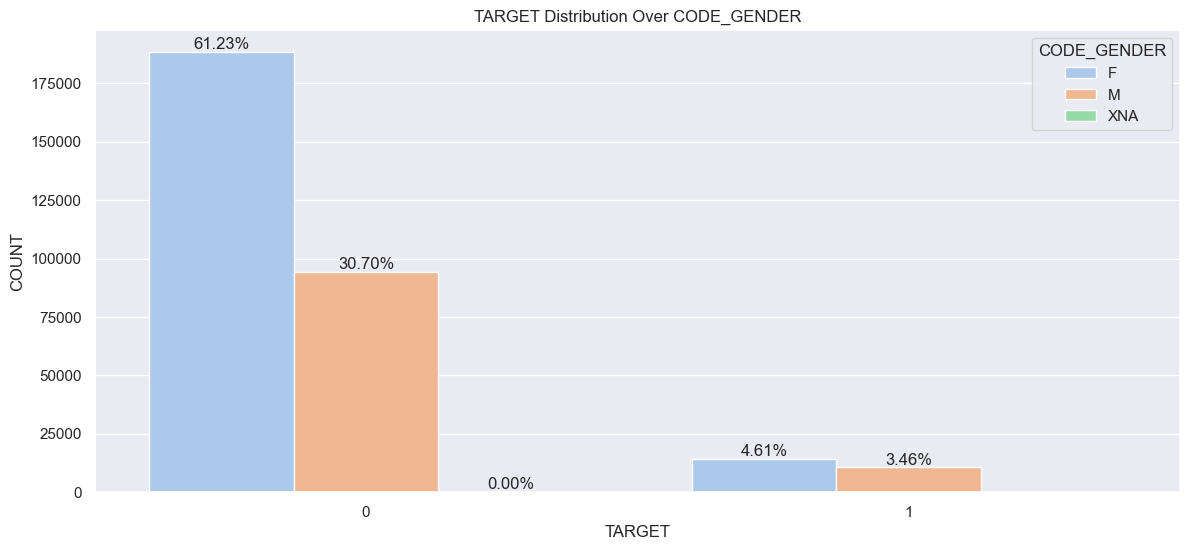

<Figure size 1400x600 with 0 Axes>

In [16]:
plot_utils.feature_balance(df=application_train, target_col="TARGET", hue="CODE_GENDER")

We can see that 61.23% of dataset are Females who don't have any difficulties with payment of loan, while 30.70 are Mens. So we already see that Female tend to apply for the loan for often than men. 

In distribution of people who have difficulties we see just about ~1% difference between Male and Female.

For Gender feature we have 3 options: Male, Female and XNA. For XNA values we will change this values to be the mode of the column because we have only a few values in dataset.

In [17]:
application_train[application_train["CODE_GENDER"] == "XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289.0,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044.0,-10024.0,-3537,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669.0,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797.0,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.9811,0.0417,0.9811,0.0417,0.9811,0.0417,0.0090,No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708.0,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228.0,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,0.9921,0.1667,0.9921,0.1667,0.9921,0.1667,0.0769,No,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880.0,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293.0,-4099.0,-2326,1,1,1,1,1,0,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,0.360613,0.9712,0.0833,0.9712,0.0833,0.9712,0.0833,0.0245,No,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [18]:
application_train["CODE_GENDER"] = application_train["CODE_GENDER"].replace(
    "XNA", application_train["CODE_GENDER"].mode()[0])

### Customer Age

Client's age in years at the time of application

In [19]:
application_train = transform_columns(
    df=application_train, 
    target_columns=["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"],
    return_columns=["AGE", "YEARS_OF_WORKING", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH"], 
    remove_old_cols=True)

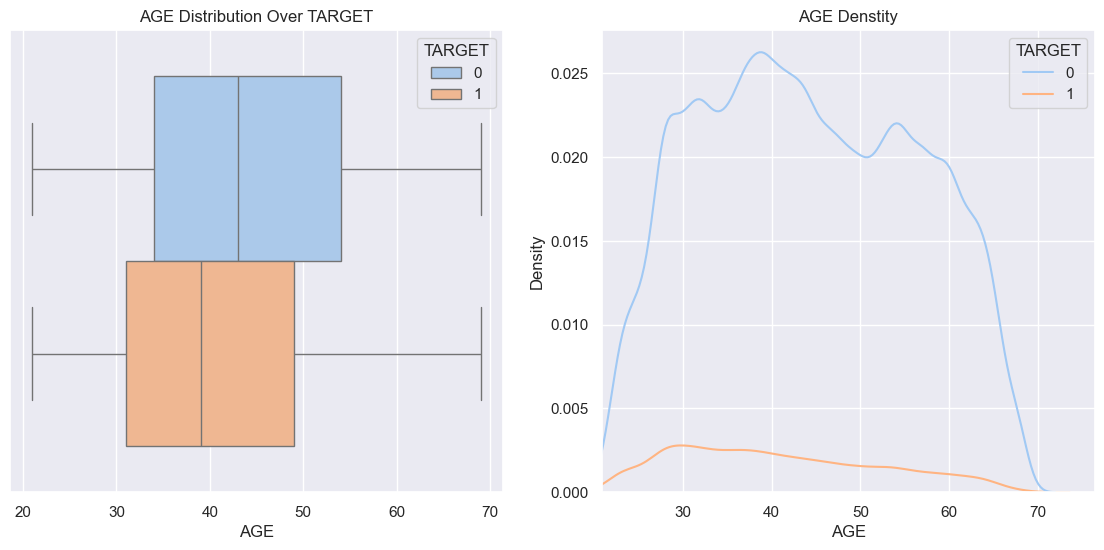

<Figure size 1400x600 with 0 Axes>

In [20]:
plot_utils.horizontal_kde_box_plot(df=application_train, x="AGE", hue="TARGET")

<li>We can see that customer Age goes from 18 to 72.</li>
<li>Average age for customer who have difficulties with loan is 39, while people without difficulties are 43.</li>
<li>For group with target 0, most of the people are from 33 to 54 years.</li>
<li>For group with target 1, most of the people are from 31 to 49 years.</li>
<li>Age density shows, that we have 2 spikes for target 0, it is 38 and 54 years.</li>
<li>For age density of target 1, we don't see a high spike, but we see that most of the people are about 29 years old.</li>


### Customer Work Experience

Years customer work for current employment.

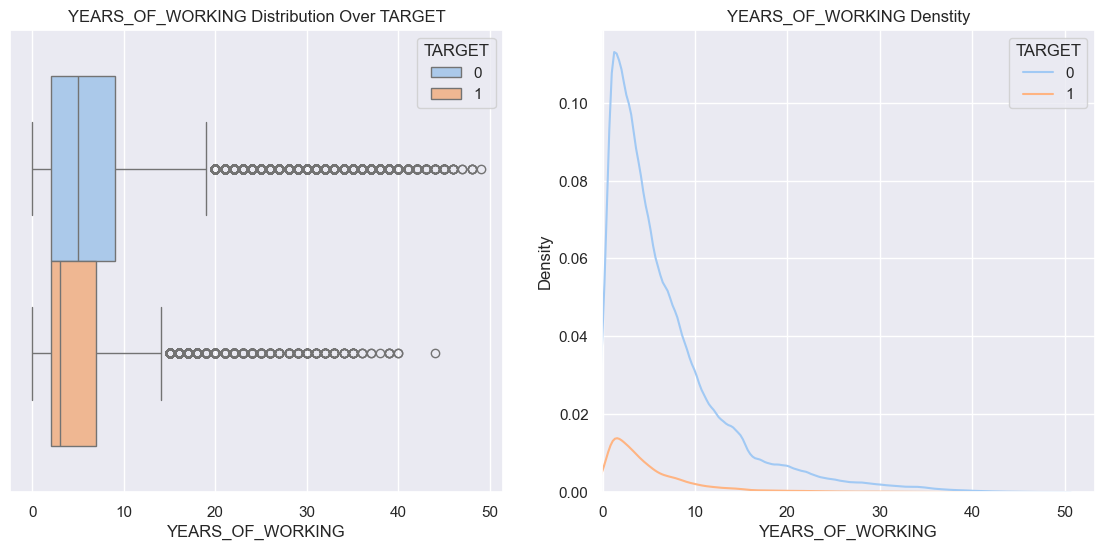

<Figure size 1400x600 with 0 Axes>

In [21]:
plot_utils.horizontal_kde_box_plot(df=application_train, x="YEARS_OF_WORKING", hue="TARGET")

Work experience show that we have quite a lot of outliers, where people work in one job for more than 20 years, up to 50. While it is possible, but most of the people work for one employer from about 2 to 9 years.
<li>On average, customers with target 0 work for one employer for about 6 years.</li>
<li>From other hand, customers with target 1 works about 3 years for one employer.</li>
<li>Density plot show that in our dataset, about 12% of applicants work only 1 year before applying for a loan.</li>

### Registration Place Change

Years before the application did client change his registration place.

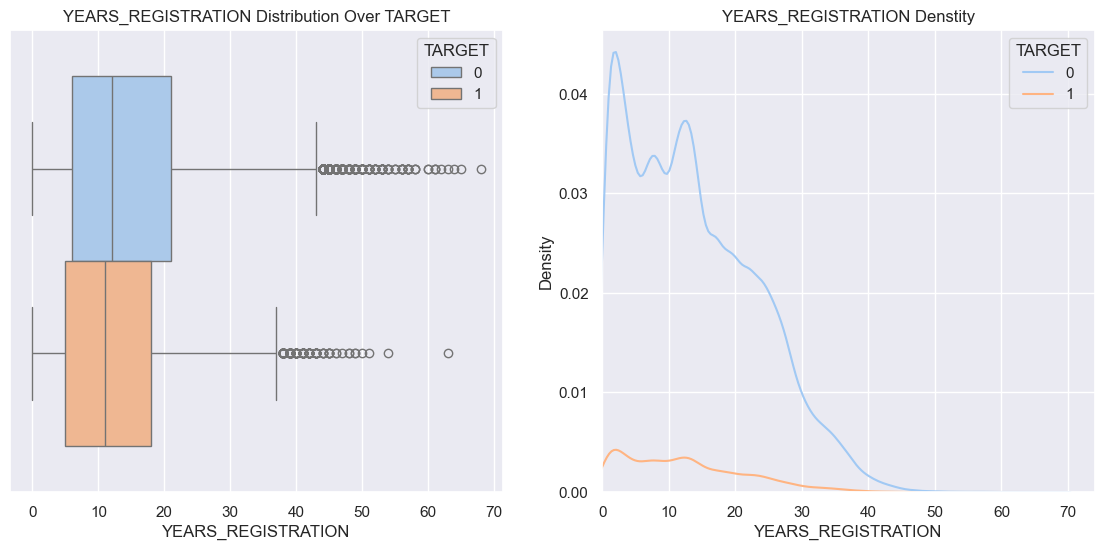

<Figure size 1400x600 with 0 Axes>

In [22]:
plot_utils.horizontal_kde_box_plot(df=application_train, x="YEARS_REGISTRATION", hue="TARGET")

Similar to Work Experience, the biggest spikes for density plot shows at 1 year mark.
<li>For both groups we can see outliers, people still go for a loan after changing registration place even after 35 years.</li>
<li>We can see that most of the people go for the loan after changing their registration place, the more time pass, the less people go for a loan.</li>

### Identity Document Change

Years before the application did client change the identity document with which he applied for the loan.

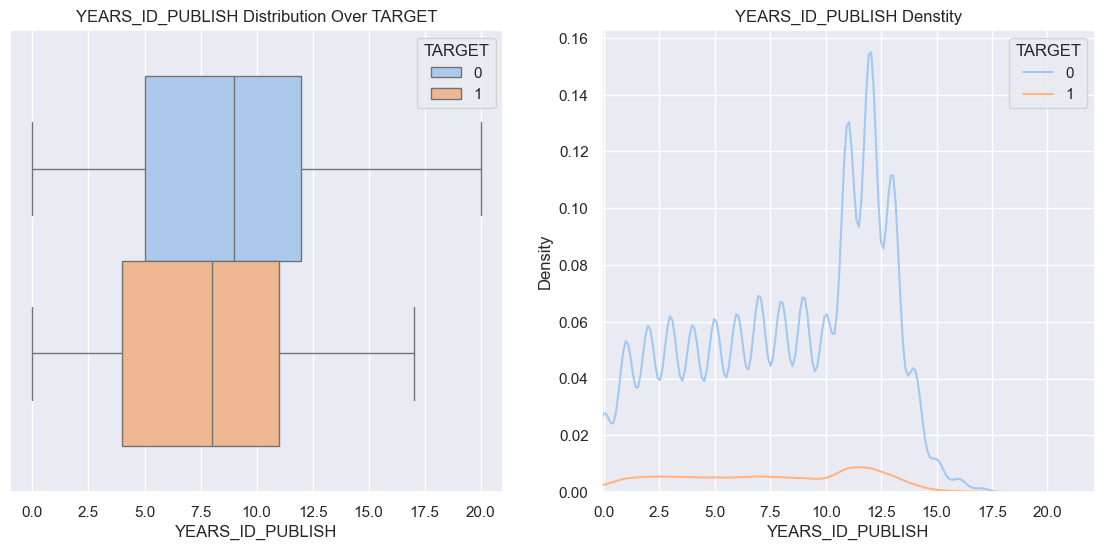

<Figure size 1400x600 with 0 Axes>

In [23]:
plot_utils.horizontal_kde_box_plot(df=application_train, x="YEARS_ID_PUBLISH", hue="TARGET")

We can see high spikes on range from 10 to 13 years. Possible it is for people who change their nationality and want to get a loan. 

### Customer Income

Income of the client

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Percent'>

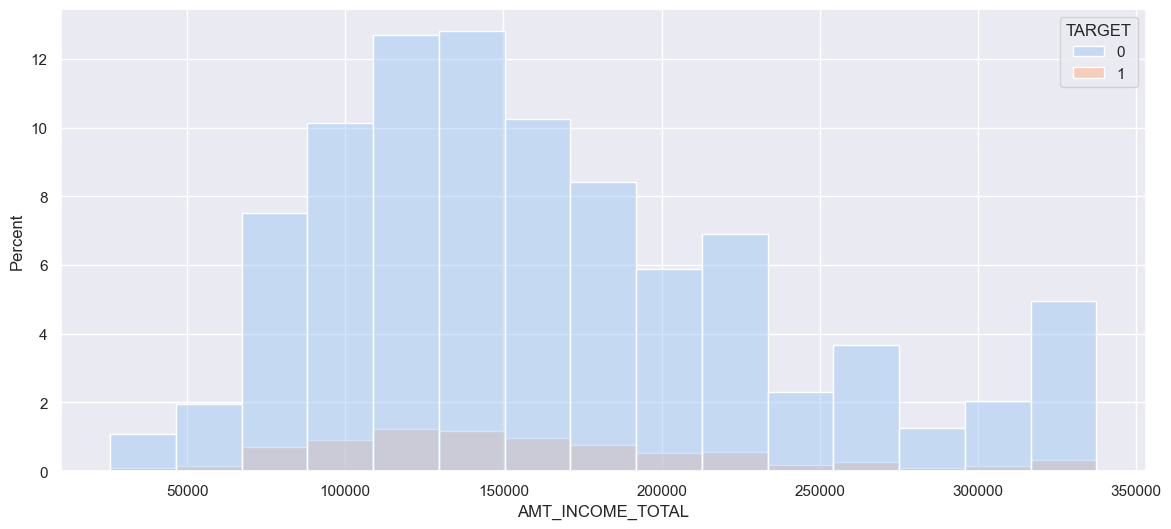

In [24]:
sns.histplot(data=application_train, x="AMT_INCOME_TOTAL", hue="TARGET", bins=15, stat="percent")

<li>Histogram shows that our data skewed to the right, indicating most incomes are on the right side of the plot.</li>

### Customer Children Count

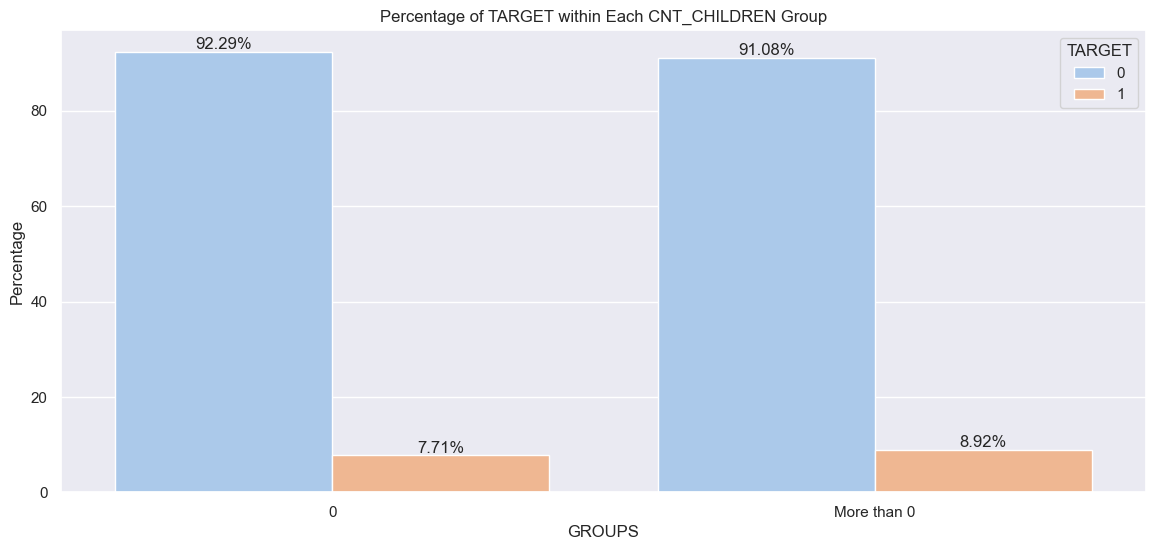

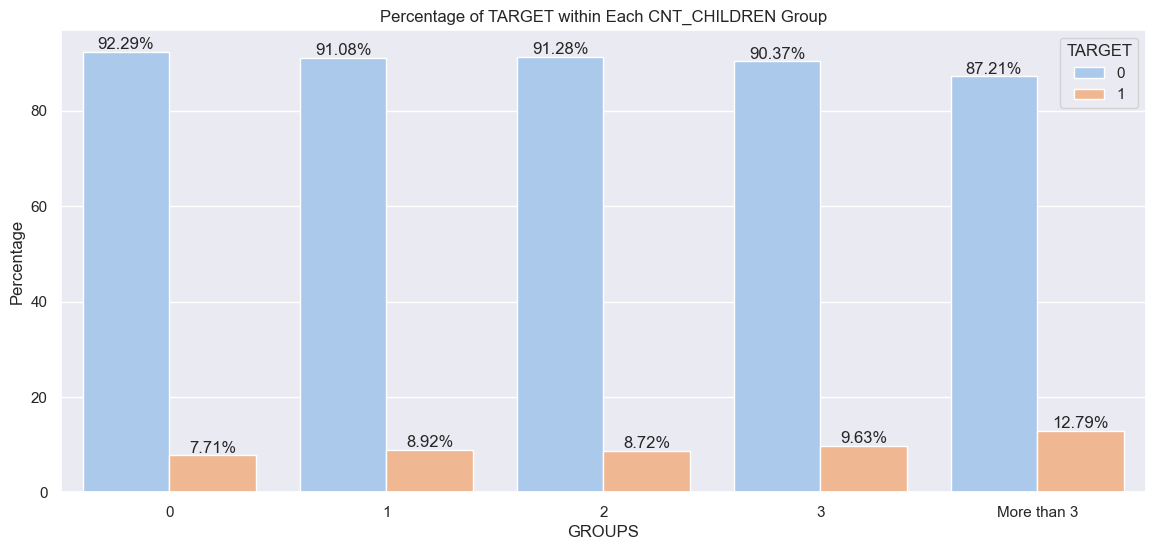

<Figure size 1400x600 with 0 Axes>

In [25]:
plot_utils.plot_percentage_bars_numerical(application_train, "CNT_CHILDREN", "TARGET", max_values=1)
plot_utils.plot_percentage_bars_numerical(application_train, "CNT_CHILDREN", "TARGET", max_values=4)

<li>Having no children leads to lower percentage of Target 1</li>
<li>Increasing children count increase Target 1 percentage.</li>
<li>About ~1.2% difference between having children and not for Target feature.</li>

### Employment Status

Client's income type (businessman, working, maternity leave, etc..)

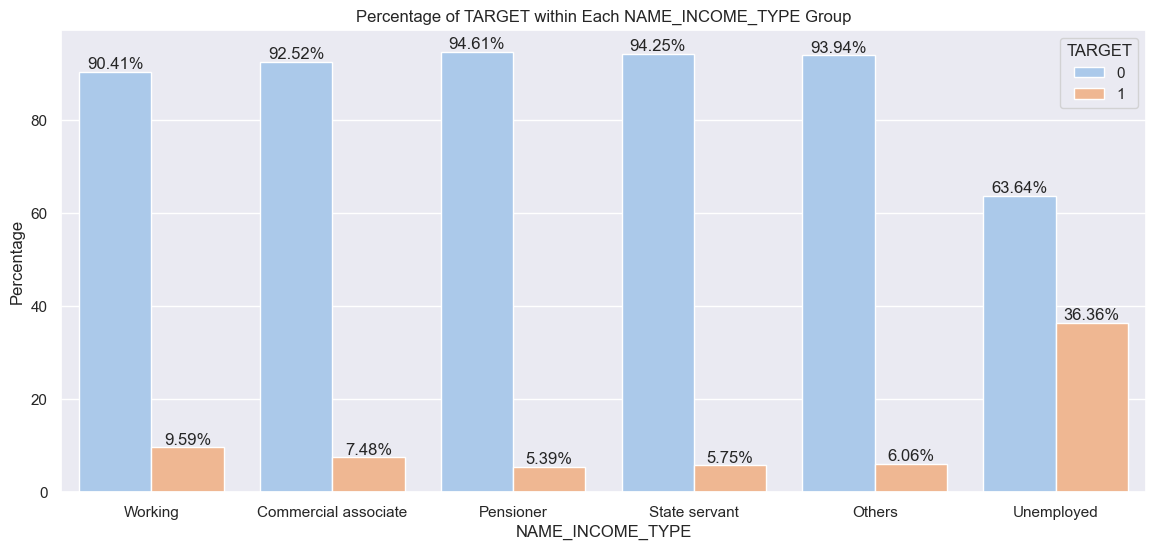

<Figure size 1400x600 with 0 Axes>

In [26]:
plot_utils.plot_percentage_bars_categorical(application_train, "NAME_INCOME_TYPE", "TARGET", max_values=5)

<li>Unemployed customers have about ~36% to not have a loan.</li>
<li>Being State servant or Pensioner, give the highest percentage to get a loan.</li>
<li>While working there are still 1 out of 10 chance to not get a loan.</li>

### Education Status

Level of highest education the client achieved

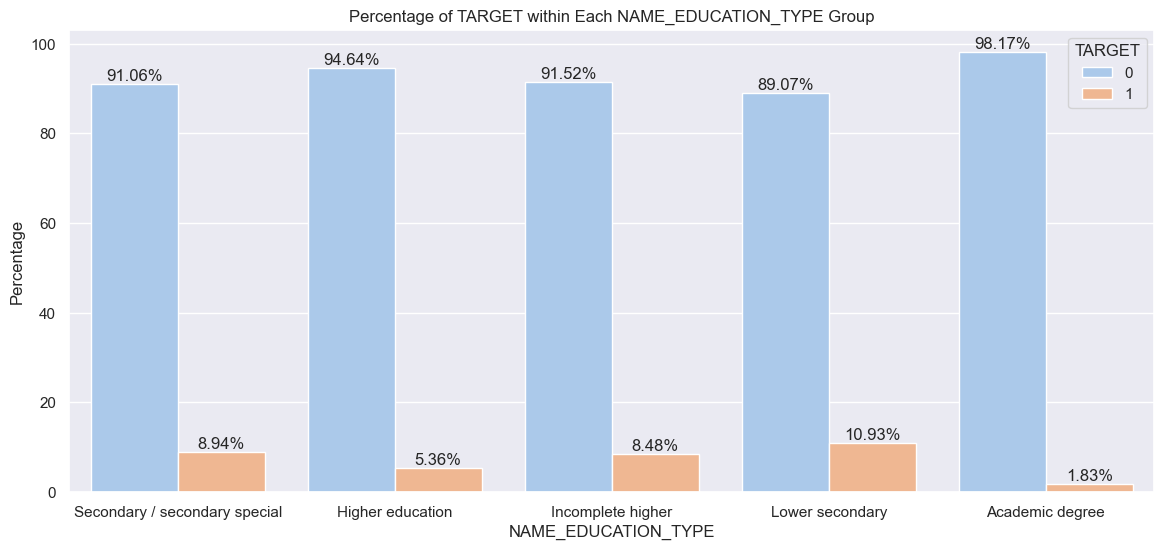

<Figure size 1400x600 with 0 Axes>

In [27]:
plot_utils.plot_percentage_bars_categorical(application_train, "NAME_EDUCATION_TYPE", "TARGET", max_values=5)

<li>Having academic degree gives only 1.83% for Target 1</li>
<li>Having higher education lowers Target 1 percentage.</li>

### Family Status

Family status of the client

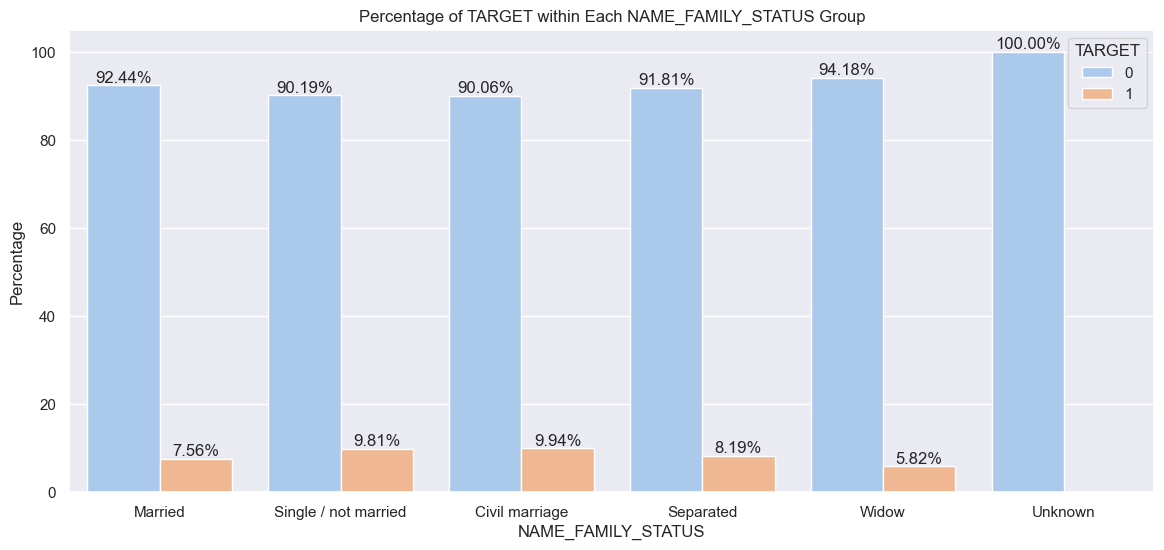

<Figure size 1400x600 with 0 Axes>

In [28]:
plot_utils.plot_percentage_bars_categorical(application_train, "NAME_FAMILY_STATUS", "TARGET", max_values=8)

In [29]:
pd.DataFrame(application_train["NAME_FAMILY_STATUS"].value_counts().reset_index().T)

,0,1,2,3,4,5
NAME_FAMILY_STATUS,Married,Single / not married,Civil marriage,Separated,Widow,Unknown
count,196432,45444,29775,19770,16088,2


<li>We have 2 customers who don't have indication of Family Status, for those people we will use mode to change values.</li>
<li>Widow status indicates quite high chance to get the loan - 94.18%, but we can also see that customer count is only 16 088.</li>
<li>Married customers have the second-highest chance to get the loan  with 92.44% and also having most of the customers in this group. </li>
<li>Being separated is in third place, having 91.81% chance to get the loan.</li>
<li>Single or civil marriage are quite similar, having both little bit more than 90%.</li>


In [30]:
application_train["NAME_FAMILY_STATUS"]= application_train["NAME_FAMILY_STATUS"].replace(
    "Unknown", application_train["NAME_FAMILY_STATUS"].mode()[0])

### Housing Type

What is the housing situation of the client (renting, living with parents, ...)

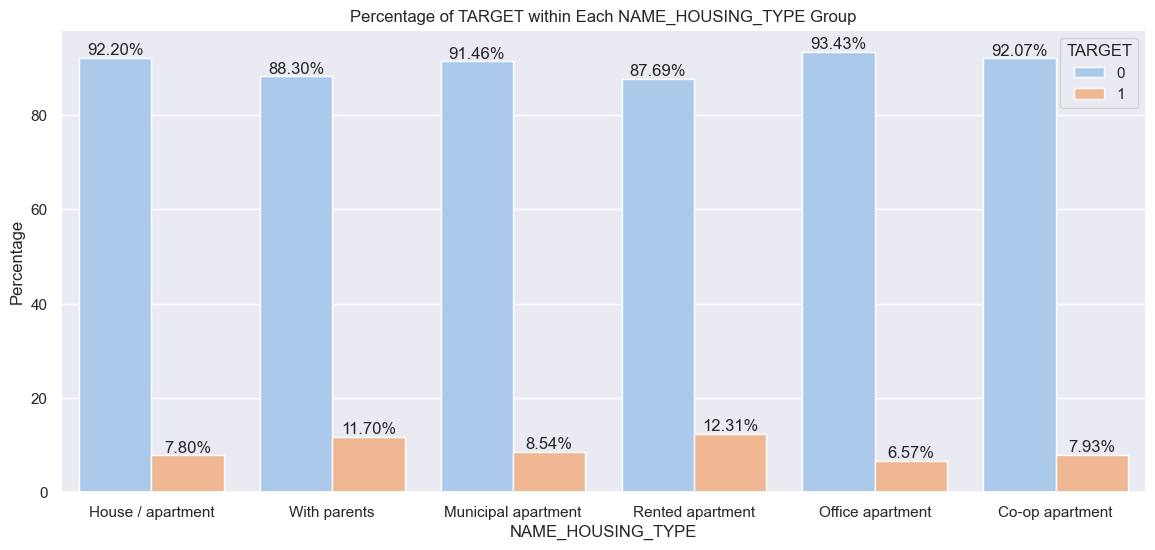

<Figure size 1400x600 with 0 Axes>

In [31]:
plot_utils.plot_percentage_bars_categorical(application_train, "NAME_HOUSING_TYPE", "TARGET", max_values=8)

In [32]:
pd.DataFrame(application_train["NAME_HOUSING_TYPE"].value_counts().reset_index().T)

,0,1,2,3,4,5
NAME_HOUSING_TYPE,House / apartment,With parents,Municipal apartment,Rented apartment,Office apartment,Co-op apartment
count,272868,14840,11183,4881,2617,1122


<li>Having own house / apartment shows highest percentage of getting a loan + 90%.</li>
<li>While living with parents or renting apartment indicates lower percentage - ~88%</li>
<li>Having real estate provide better results in loan status.</li>

### Occupation Type

What kind of occupation does the client have

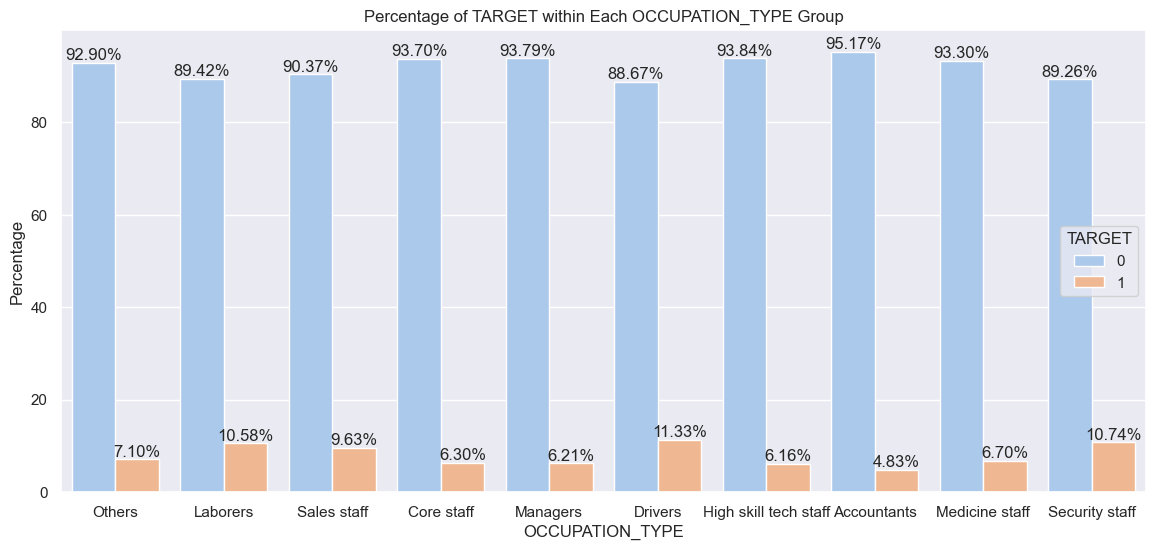

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
OCCUPATION_TYPE,nan,Laborers,Sales staff,Core staff,Managers,Drivers,High skill tech staff,Accountants,Medicine staff,Security staff,Cooking staff,Cleaning staff,Private service staff,Low-skill Laborers,Waiters/barmen staff,Secretaries,Realty agents,HR staff,IT staff
count,96391,55186,32102,27570,21371,18603,11380,9813,8537,6721,5946,4653,2652,2093,1348,1305,751,563,526


<Figure size 1400x600 with 0 Axes>

In [33]:
plot_utils.plot_percentage_bars_categorical(application_train, "OCCUPATION_TYPE", "TARGET", max_values=9)
pd.DataFrame(application_train["OCCUPATION_TYPE"].value_counts().reset_index().T)

<li>Higher role indicates better percentage from 90% to 95%.</li>
<li>While having job title like Driver or Laborer lower it to less than 89%</li>
<li>We indicate NULL values in this feature too, for those values we can create additional group "Unknown".</li>

In [34]:
application_train["OCCUPATION_TYPE"]= application_train["OCCUPATION_TYPE"].replace(
    "Unknown", application_train["OCCUPATION_TYPE"].mode()[0])

### Week Day Application Send

On which day of the week did the client apply for previous application

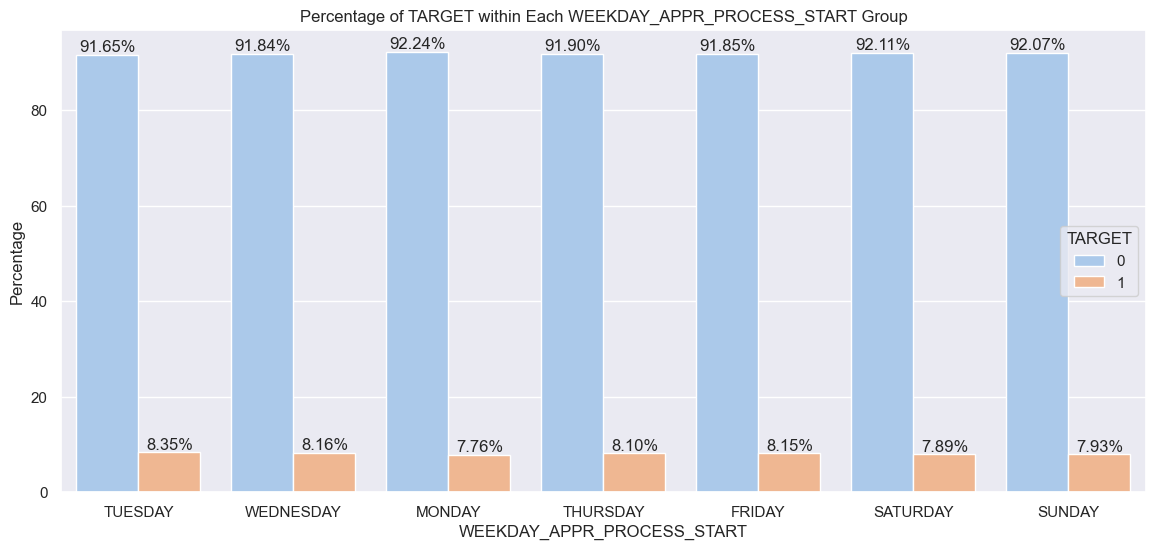

<Figure size 1400x600 with 0 Axes>

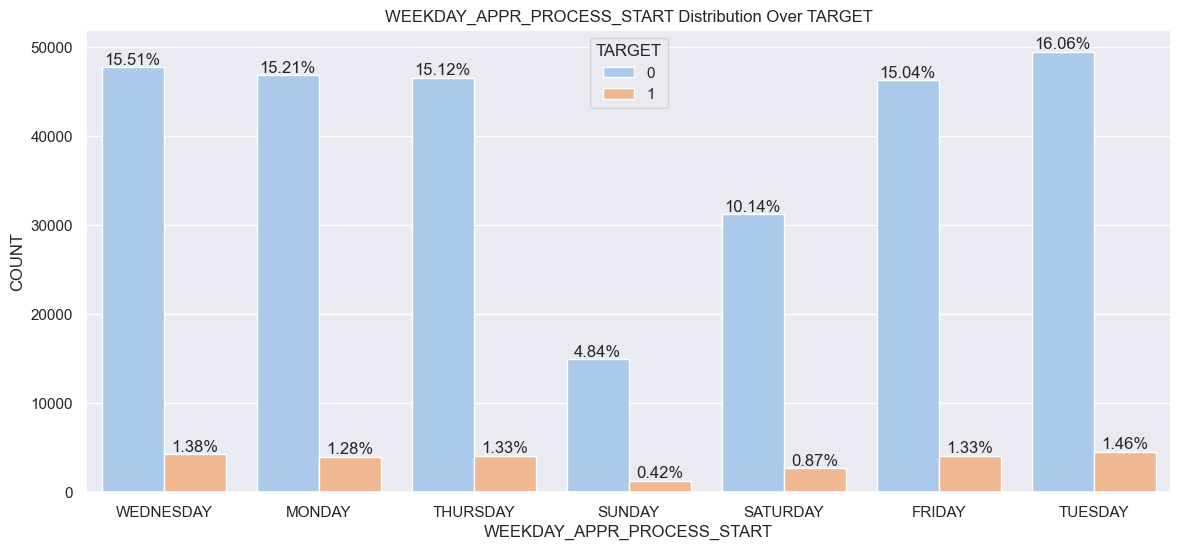

<Figure size 1400x600 with 0 Axes>

In [35]:
plot_utils.plot_percentage_bars_categorical(application_train, "WEEKDAY_APPR_PROCESS_START", "TARGET", max_values=8)
plot_utils.feature_balance(df=application_train, target_col="WEEKDAY_APPR_PROCESS_START", hue="TARGET")

<li>Week day indicates that on Monday, customers have the highest percentage of getting the loan - 92.24%</li>
<li>Difference between days is less than 1%</li>
<li>While checking the data distribution across our dataset, it shows that application count is way smaller on weekend.</li>
<li>Tuesday indicates the highest count per day, holding ~16% while other days except weekend holds 15% - 15.5%.</li>


### Loan Type

Identification if loan is cash or revolving.

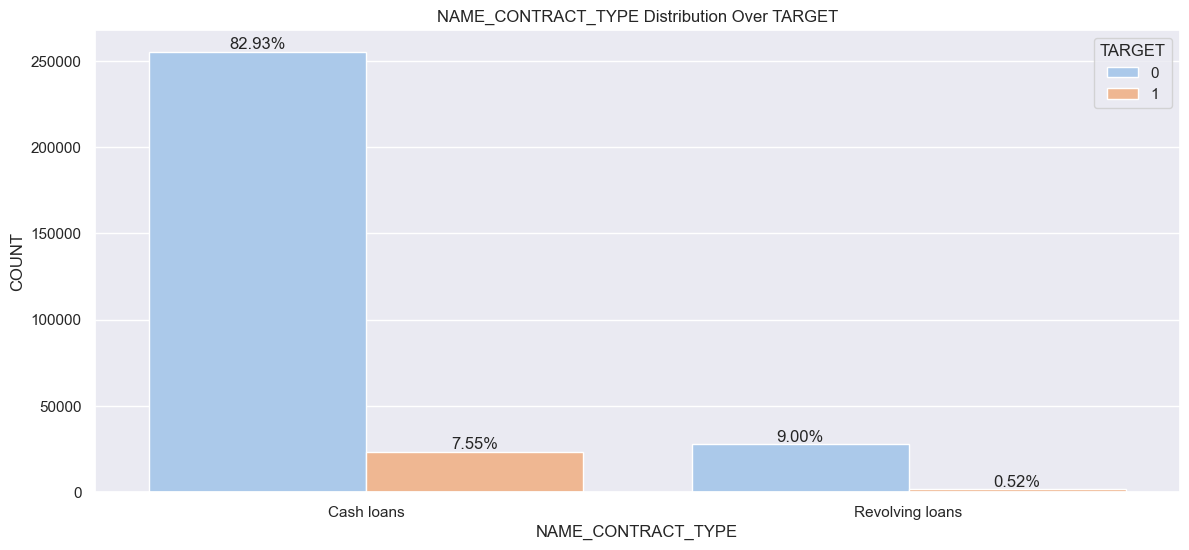

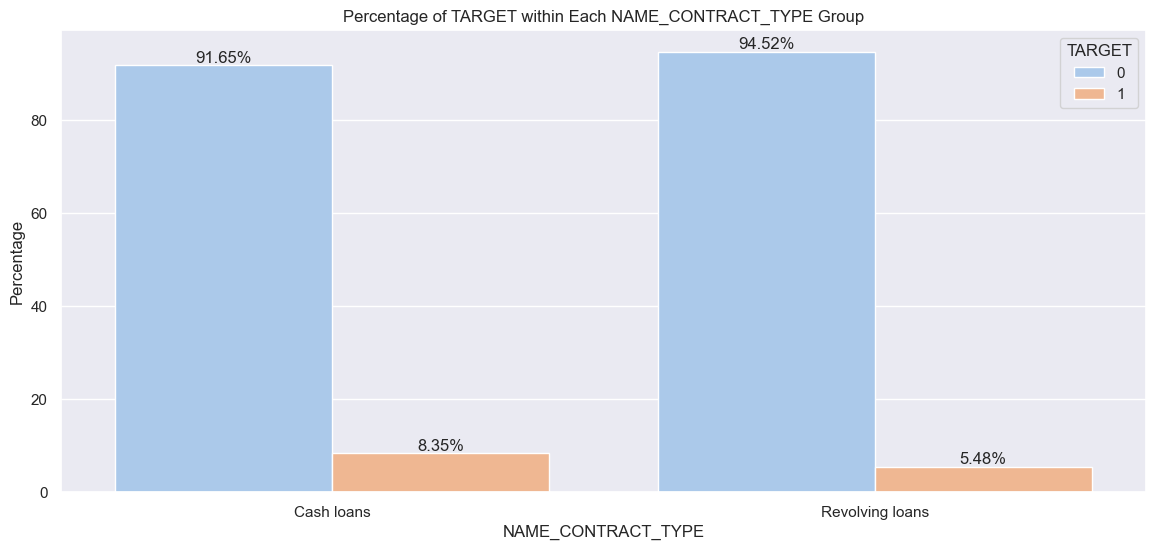

<Figure size 1400x600 with 0 Axes>

In [36]:
plot_utils.feature_balance(df=application_train, target_col="NAME_CONTRACT_TYPE", hue="TARGET")
plot_utils.plot_percentage_bars_categorical(application_train, "NAME_CONTRACT_TYPE", "TARGET", max_values=2)

application_train['NAME_CONTRACT_TYPE'] = application_train['NAME_CONTRACT_TYPE'].map({
    "Cash loans": True,
    "Revolving loans": False
})

<li>About ~90% of loans are Cash loans</li>
<li>Cash loans have 91.65% to get the loan vs 94.52 % for revolving loan.</li>
<li>Revolving loan have ~3% difference.</li>

### Hypothesis Testing

To know which features are useful for use, we will perform hypothesis testing, to check if feature have any significance associate with target.

We will set significance level (α) to be 0.05 for this analysis. It's mean p-value lees than 0.05 leads to null hypothesis rejection.

<b>Hypothesis:</b>

<li><b>Null Hypothesis (H0):</b> The feature has no significant impact on the Target feature.</li>
<li><b>Alternative Hypothesis (H1):</b> The feature have a significant impact on the Target feature.</li>
<br>
Assumptions:
<li>Independence of Observations: All data points are independent.</li>

<br>
For Categorical Features:
<li>Cramer's V will be used to measure the strength between feature connection.</li>
<li>Non-overlapping Groups: The categories in the table don't mix. Each item only fits into one category. For example, a loan can only be “Approved” or “Not Approved,” not both.</li>
<li>Enough Data for Each Group: At least 80% of the table’s cells should have 5 or more expected items in them.</li>

<br>
For Numerical Features:
<li>Cohen's d will be used to check effect for then numerical features.</li>
<li>Large sample size will be used.</li>
<li>Features are in numerical or ordinal scale.</li>
<li>T-Test (for binary features) or ANOVA (for multi class features) will be used.</li>

<br>
We also split our features to categorical and numerical, it will help us understand how features depend on Target.

In [37]:
# Get categorical features (excluding the 'TARGET' column)
categorical_features = [col for col in application_train.columns 
                        if (application_train[col].dtype == "category" or application_train[col].dtype == "object") 
                        and col != "TARGET"]

# Get numerical features (excluding the 'TARGET' column)
numerical_features = [col for col in application_train.columns 
                      if col not in categorical_features and col != "TARGET"]

In [38]:
categorical_df, numerical_df = hypothesis_testing(application_train, "TARGET", categorical_features, numerical_features)

In [39]:
categorical_df = categorical_df[categorical_df["Reject Null Hypothesis"] == "Yes"]
categorical_df

,Feature,P-value,Test,Reject Null Hypothesis,"Cramer""s V"
8,OCCUPATION_TYPE,0.000000e+00,Chi-Square,Yes,0.018890
10,ORGANIZATION_TYPE,5.224541e-299,Chi-Square,Yes,0.009582
4,NAME_INCOME_TYPE,1.928146e-266,Chi-Square,Yes,0.024131
5,NAME_EDUCATION_TYPE,2.447681e-219,Chi-Square,Yes,0.028785
0,CODE_GENDER,4.183493e-202,Chi-Square,Yes,0.054700
6,NAME_FAMILY_STATUS,6.983958e-108,Chi-Square,Yes,0.020253
7,NAME_HOUSING_TYPE,1.099089e-88,Chi-Square,Yes,0.016539
1,FLAG_OWN_CAR,9.330994e-34,Chi-Square,Yes,0.021838
11,EMERGENCYSTATE_MODE,1.138680e-06,Chi-Square,Yes,0.012099
3,NAME_TYPE_SUITE,1.132931e-05,Chi-Square,Yes,0.004227


Categorical features show, that all of those features are rejecting null hypothesis. Some of the features like Occupation type, Organization type, have high P_value, while not indicating high Cramer's V which would indicate strong connection to Target feature.

In [40]:
numerical_df = numerical_df[numerical_df["Reject Null Hypothesis"] == "Yes"]
numerical_df

,Feature,P-value,Test,Reject Null Hypothesis,"Cohen""s d"
24,EXT_SOURCE_2,0.000000e+00,T-test,Yes,0.562319
25,EXT_SOURCE_3,0.000000e+00,T-test,Yes,0.656891
64,AGE,0.000000e+00,T-test,Yes,0.292958
65,YEARS_OF_WORKING,0.000000e+00,T-test,Yes,0.292993
16,REGION_RATING_CLIENT_W_CITY,2.078455e-250,T-test,Yes,-0.224327
15,REGION_RATING_CLIENT,2.172433e-234,T-test,Yes,-0.217187
37,DAYS_LAST_PHONE_CHANGE,3.186846e-206,T-test,Yes,-0.210677
67,YEARS_ID_PUBLISH,1.311914e-178,T-test,Yes,0.188276
22,REG_CITY_NOT_WORK_CITY,3.805463e-176,T-test,Yes,-0.179662
9,FLAG_EMP_PHONE,1.442660e-143,T-test,Yes,-0.180958


From other hand, numerical features show high effect on Target feature, Cohen's value show more than 0.5. Those feature will be important for our ML model. We also need to inspect those features to get more knowledge about them.

### Ext Source Analysis
Normalized score from external data source, normalized. 
<br>
We don't have any information about these features, but as we saw they are quite important for our ML model.

In [41]:
application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull().sum()

EXT_SOURCE_2      660
EXT_SOURCE_3    60965
dtype: int64

In [42]:
application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,3.068510e+05,246546.000000
mean,5.143928e-01,0.510853
std,1.910602e-01,0.194844
min,8.173617e-08,0.000527
25%,3.924574e-01,0.370650
50%,5.659614e-01,0.535276
75%,6.636171e-01,0.669057
max,8.549997e-01,0.896010


Looks like Ext Source 2 have quite small null values count, but also it has outliers, with minimum value way too smaller than other values. 
For Ext Source 3 we see quite a lot of missing values, but data is quite normally distributed.

In [43]:
quantile_threshold_ext = application_train["EXT_SOURCE_2"].quantile(0.05)
application_train["EXT_SOURCE_2"] = application_train["EXT_SOURCE_2"].clip(lower=quantile_threshold_ext)

In [44]:
application_train["EXT_SOURCE_2"] = application_train["EXT_SOURCE_2"].replace(
    "XNA", application_train["EXT_SOURCE_2"].mean())

application_train["EXT_SOURCE_3"] = application_train["EXT_SOURCE_3"].replace(
    "XNA", application_train["EXT_SOURCE_3"].mean())

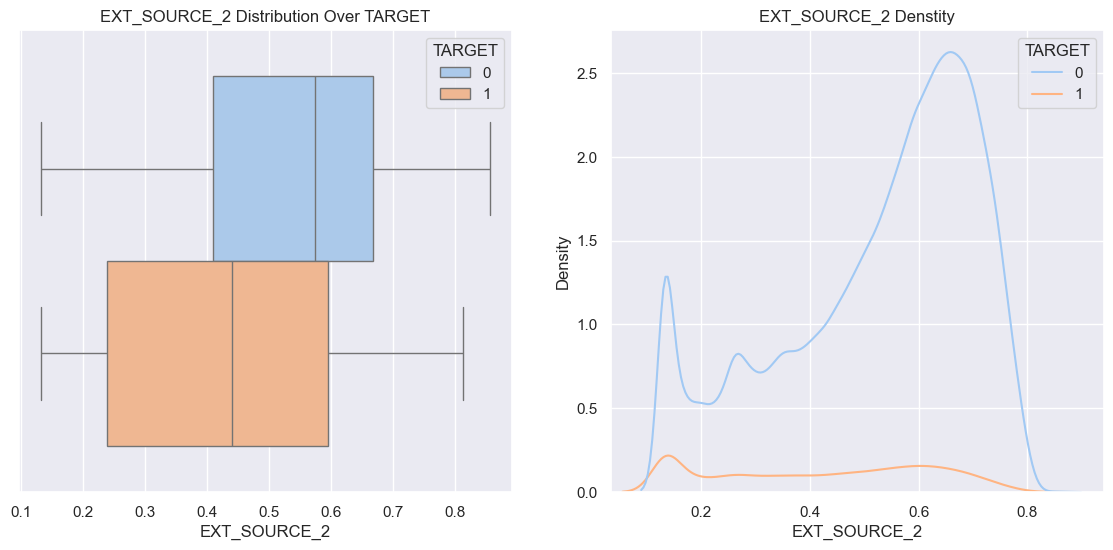

<Figure size 1400x600 with 0 Axes>

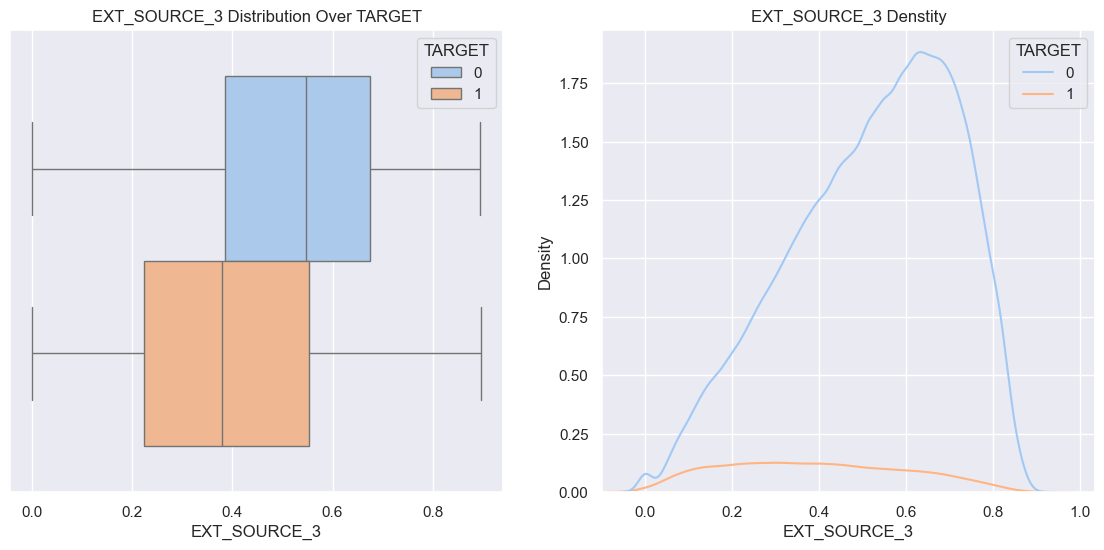

<Figure size 1400x600 with 0 Axes>

In [45]:
plot_utils.horizontal_kde_box_plot(df=application_train, x="EXT_SOURCE_2", hue="TARGET")
plot_utils.horizontal_kde_box_plot(df=application_train, x="EXT_SOURCE_3", hue="TARGET")

Both source indicates that most customer are base at 0.65 for Target 0.
For Target 1 we can see differences. 
Source 2 indicates spike at 0.1 also line rise up to 0.6, from there it shrinks.
Source 3 shows that most customer with Target 1 are more based on the left side of the plot, which is opposite to Target 0.
Box plots show that for Source 3 Target 1 0.25 quantile is higher than Target 1 average.

<br>
We can see quite big difference between source 2 and 3  for the target 1. Source 2 having quite simmilar density plot for both target values, while source 3 indicate differences.

In [46]:
application_train.to_parquet(f"{path_filtered}/application_train_eda.parquet", engine="pyarrow")

## EDA Summary

<li>CSV files converted to parquet type.</li>
<li>A lot of features have missing values, we work only with features which have less than 50% missing value rate.</li>
<li>For AMT_INCOME_TOTAL feature, we lower the scale of data by setting the quantile boundary at 0.95. </li>
<li>Main feature TARGET his highly imbalance 92% - 8%</li>
<li>Older people tend to have fewer difficulties with getting the loan.</li>
<li>Most people go for the loan while having only 1 year of working experience.</li>
<li>Most of the people go for the loan after 10 years of changing ID.</li>
<li>AMT_INCOME_TOTAL histogram shows that our data skewed to the right, indicating most incomes are on the right side of the plot.</li>
<li>Having no children leads to lower percentage of Target 1</li>
<li>Having higher education lowers Target 1 percentage.</li>
<li>Having real estate provide better results in loan status.</li>
<li>Higher job role indicates better percentage for loan.</li>
<li>Difference between days when people go for loan is less than 1%, while less people apply in weekend.</li>
<li>About ~90% of loans are Cash loans</li>
<li>Hypothesis testing give us features which have impact on Target status.</li>
<li>Categorical features show, that all of those features are rejecting null hypothesis. Some of the features like Occupation type, Organization type, have high P_value, while not indicating high Cramer's V which would indicate strong connection to Target feature.</li>
<li>Numerical features show high effect on Target feature, Cohen's value show more than 0.5. Those feature will be important for our ML model. We also need to inspect those features to get more knowledge about them.</li>
<li>EXT_SOURCE_2 and EXT_SOURCE_3 have highest impact on Target feature.</li>

<br>
<li>New features will help our ML model, we remove additional features which are not important for us.</li>

### Next part of the project is in the `feature_engineering_models.ipynb` file.
